In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import datetime as datetime
import matplotlib.pyplot as plt

import os
import pickle


In [2]:
X = pickle.load(open("../data/interest_rate_data", "rb" ))
X_fwds = pickle.load(open('../data/forward_rates', 'rb'))
X_zeros = pickle.load(open('../data/zero_rates', 'rb'))


In [3]:
fed_metrics = pickle.load( open( "../data/mvp_cosine_sim", "rb" ) )
cos_last = fed_metrics['cos_last']
cos_avg_n = fed_metrics['cos_avg_n']
ed_last = fed_metrics['ed_last']
ed_avg_n = fed_metrics['ed_avg_n']
fed_dates = fed_metrics['dates']

# ISSUE: Multiple dates in fed_dates (one date occurs multiple times)

In [4]:
# X['cos_last'] = 0
# X_fwds['cos_last']=0
# X_zeros['cos_last']=0
# X['cos_avg'] = 0
# X_fwds['cos_avg']=0
# X_zeros['cos_avg']=0

# X['ed_last'] = 0
# X_fwds['ed_last']=0
# X_zeros['ed_last']=0
# X['ed_avg'] = 0
# X_fwds['ed_avg']=0
# X_zeros['ed_avg']=0


In [5]:
#

'12/19/2016'

In [6]:
#ed_last[i]


1.2830292182745116

In [7]:
#print(type(fed_dates))

<class 'numpy.ndarray'>


In [9]:
XX = X.copy()

In [11]:
# # first find unique dates for the fed dates
# date_list = []
# for i in range(len(fed_dates)):
#     this_date = fed_dates[i]
#     if this_date not in date_list:
#         date_list.append(this_date)


In [12]:
# now creating the loop to assign variables to the X, X_zeros and X_fwds

In [13]:
# date_list

In [14]:
# # find index to all dates in fed dates with this date
# ind_dates = fed_dates==date_list[i]

In [15]:
# # find ed for this index
# this_ed = np.mean(ed_last[ind_dates])

In [16]:
# this_ed

In [17]:
# i = 457
# date_list[i]

In [18]:
# ind_dates = fed_dates==date_list[i]
# sum(ind_dates)

In [19]:
# for i in range(len(date_list)):
#     this_sum = sum(fed_dates==date_list[i])
#     if this_sum > 1:
#         break

In [20]:
# fed_dates==date_list[i]
# this_sum

In [21]:
avgstats = pd.DataFrame( {'date':fed_dates, 
               'ed_last':ed_last,
               'ed_avg_n':ed_avg_n,
               'cos_last':cos_last,
               'cos_avg_n':cos_avg_n} ).groupby("date").mean()

In [22]:
avgstats.index = pd.to_datetime( avgstats.index )

In [26]:
X = X.merge(avgstats, left_index=True, right_index=True)

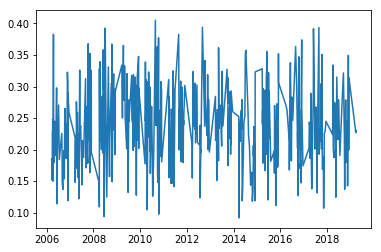

In [28]:
plt.plot(X['cos_last'])
#head()

In [15]:
# HERE IT IS!!!
for i in range(len(date_list)):
    this_date = date_list[i]
    ind_dates = fed_dates==date_list[i]
    this_ed_last = np.mean(ed_last[ind_dates])
    this_ed_avg_n =np.mean(ed_avg_n[ind_dates])
    this_cos_last = np.mean(cos_last[ind_dates])
    this_cos_avg_n = np.mean(cos_avg_n[ind_dates])
    
    this_date = pd.to_datetime(this_date)
    # now put these into the dataframes
    X['cos_last'].loc[this_date] = this_cos_last
    X['cos_avg'].loc[this_date] = this_cos_avg_n
    X['ed_last'].loc[this_date] = this_ed_last
    X['ed_avg'].loc[this_date] = this_ed_avg_n
    
    X_fwds['cos_last'].loc[this_date] = this_cos_last
    X_fwds['cos_avg'].loc[this_date] = this_cos_avg_n
    X_fwds['ed_last'].loc[this_date] = this_ed_last
    X_fwds['ed_avg'].loc[this_date] = this_ed_avg_n
    
    X_zeros['cos_last'].loc[this_date] = this_cos_last
    X_zeros['cos_avg'].loc[this_date] = this_cos_avg_n
    X_zeros['ed_last'].loc[this_date] = this_ed_last
    X_zeros['ed_avg'].loc[this_date] = this_ed_avg_n
        
    #print(this_ed_last, this_ed_avg_n, this_cos_last, this_cos_avg_n)

In [ ]:
i = 0
this_date = date_list[i]
print(this_date)
print(type(this_date))

In [ ]:
df_this_date = pd.to_datetime(this_date)
df_this_date

In [ ]:
X.loc[df_this_date]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2006-01-03 to 2019-03-28
Data columns (total 12 columns):
three_m     3313 non-null float64
six_m       3313 non-null float64
one_y       3313 non-null float64
two_y       3313 non-null float64
three_y     3313 non-null float64
five_y      3313 non-null float64
seven_y     3313 non-null float64
ten_y       3313 non-null float64
cos_last    3313 non-null float64
cos_avg     3313 non-null float64
ed_last     3313 non-null float64
ed_avg      3313 non-null float64
dtypes: float64(12)
memory usage: 497.3 KB


In [23]:
X.describe()

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,cos_last,cos_avg,ed_last,ed_avg
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,0.011427,0.012523,0.013427,0.015406,0.017595,0.022151,0.025897,0.029388,0.000855,0.000837,0.004031,0.004046
std,0.016504,0.016720,0.016194,0.014783,0.013717,0.011938,0.010655,0.009759,0.015098,0.014790,0.069890,0.070161
min,0.000000,0.000200,0.000800,0.001600,0.002800,0.005600,0.009100,0.013700,0.000000,0.000000,0.000000,0.000000
25%,0.000600,0.001200,0.001900,0.004700,0.008300,0.014000,0.018800,0.021900,0.000000,0.000000,0.000000,0.000000
50%,0.001800,0.003100,0.004900,0.008700,0.012700,0.018400,0.022800,0.027100,0.000000,0.000000,0.000000,0.000000
75%,0.017800,0.019500,0.021200,0.023400,0.024500,0.027300,0.030900,0.035900,0.000000,0.000000,0.000000,0.000000
max,0.051900,0.053300,0.053000,0.052900,0.052600,0.052300,0.052300,0.052600,0.347717,0.347717,1.283029,1.283029


In [24]:
X.tail()

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,cos_last,cos_avg,ed_last,ed_avg
Date,,,,,,,,,,,,
2019-03-22,0.0246,0.0248,0.0245,0.0231,0.0224,0.0224,0.0234,0.0244,0.0,0.0,0.0,0.0
2019-03-25,0.0246,0.0249,0.0241,0.0226,0.0219,0.0221,0.0232,0.0243,0.0,0.0,0.0,0.0
2019-03-26,0.0246,0.0249,0.0244,0.0224,0.0218,0.0218,0.0229,0.0241,0.0,0.0,0.0,0.0
2019-03-27,0.0244,0.0246,0.0240,0.0222,0.0216,0.0218,0.0228,0.0239,0.0,0.0,0.0,0.0
2019-03-28,0.0243,0.0244,0.0240,0.0223,0.0218,0.0220,0.0229,0.0239,0.0,0.0,0.0,0.0


In [25]:
X.head()

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,cos_last,cos_avg,ed_last,ed_avg
Date,,,,,,,,,,,,
2006-01-03,0.0416,0.0440,0.0438,0.0434,0.0430,0.0430,0.0432,0.0437,0.0,0.0,0.0,0.0
2006-01-04,0.0419,0.0437,0.0435,0.0431,0.0428,0.0428,0.0431,0.0436,0.0,0.0,0.0,0.0
2006-01-05,0.0420,0.0437,0.0436,0.0432,0.0429,0.0429,0.0431,0.0436,0.0,0.0,0.0,0.0
2006-01-06,0.0422,0.0439,0.0438,0.0436,0.0432,0.0432,0.0433,0.0438,0.0,0.0,0.0,0.0
2006-01-09,0.0423,0.0440,0.0439,0.0436,0.0432,0.0432,0.0434,0.0438,0.0,0.0,0.0,0.0


In [26]:
X.sample(100)

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,cos_last,cos_avg,ed_last,ed_avg
Date,,,,,,,,,,,,
2010-08-16,0.0016,0.0019,0.0025,0.0051,0.0076,0.0140,0.0200,0.0258,0.00000,0.00000,0.000000,0.000000
2013-09-10,0.0002,0.0004,0.0013,0.0050,0.0092,0.0178,0.0240,0.0296,0.00000,0.00000,0.000000,0.000000
2013-12-12,0.0007,0.0009,0.0014,0.0034,0.0067,0.0155,0.0226,0.0289,0.00000,0.00000,0.000000,0.000000
2007-04-03,0.0505,0.0509,0.0493,0.0463,0.0457,0.0456,0.0459,0.0467,0.00000,0.00000,0.000000,0.000000
2008-06-03,0.0185,0.0200,0.0214,0.0245,0.0275,0.0321,0.0350,0.0392,0.00000,0.00000,0.000000,0.000000
2006-01-09,0.0423,0.0440,0.0439,0.0436,0.0432,0.0432,0.0434,0.0438,0.00000,0.00000,0.000000,0.000000
2011-05-04,0.0003,0.0007,0.0019,0.0060,0.0100,0.0195,0.0261,0.0325,0.00000,0.00000,0.000000,0.000000
2016-05-23,0.0035,0.0048,0.0069,0.0091,0.0105,0.0138,0.0165,0.0184,0.00000,0.00000,0.000000,0.000000
2009-05-11,0.0019,0.0030,0.0053,0.0092,0.0134,0.0204,0.0267,0.0317,0.00000,0.00000,0.000000,0.000000


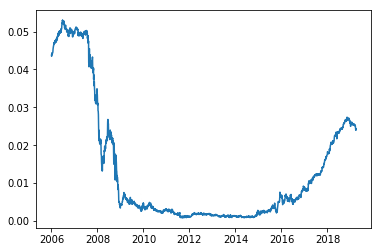

In [27]:
plt.plot(X['one_y'])

In [66]:
X

,three_m,six_m,one_y,two_y,three_y,five_y,seven_y,ten_y,cos_last,cos_avg,ed_last,ed_avg
Date,,,,,,,,,,,,
2006-01-03,0.0416,0.0440,0.0438,0.0434,0.0430,0.0430,0.0432,0.0437,0.0,0.0,0.0,0.0
2006-01-04,0.0419,0.0437,0.0435,0.0431,0.0428,0.0428,0.0431,0.0436,0.0,0.0,0.0,0.0
2006-01-05,0.0420,0.0437,0.0436,0.0432,0.0429,0.0429,0.0431,0.0436,0.0,0.0,0.0,0.0
2006-01-06,0.0422,0.0439,0.0438,0.0436,0.0432,0.0432,0.0433,0.0438,0.0,0.0,0.0,0.0
2006-01-09,0.0423,0.0440,0.0439,0.0436,0.0432,0.0432,0.0434,0.0438,0.0,0.0,0.0,0.0
2006-01-10,0.0429,0.0442,0.0442,0.0441,0.0436,0.0436,0.0438,0.0443,0.0,0.0,0.0,0.0
2006-01-11,0.0430,0.0445,0.0444,0.0444,0.0439,0.0439,0.0441,0.0446,0.0,0.0,0.0,0.0
2006-01-12,0.0432,0.0443,0.0442,0.0439,0.0435,0.0435,0.0437,0.0442,0.0,0.0,0.0,0.0
2006-01-13,0.0433,0.0443,0.0440,0.0434,0.0429,0.0428,0.0430,0.0436,0.0,0.0,0.0,0.0


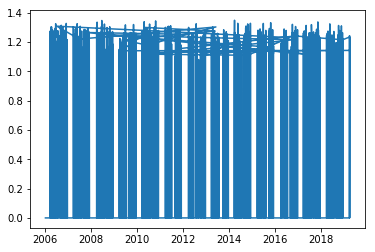

In [30]:
plt.plot(X['ed_last'])

In [34]:
X['ed_last']

Date
2006-01-03    0.000000
2006-01-04    0.000000
2006-01-05    0.000000
2006-01-06    0.000000
2006-01-09    0.000000
2006-01-10    0.000000
2006-01-11    0.000000
2006-01-12    0.000000
2006-01-13    0.000000
2006-01-17    0.000000
2006-01-18    0.000000
2006-01-19    0.000000
2006-01-20    0.000000
2006-01-23    0.000000
2006-01-24    0.000000
2006-01-25    0.000000
2006-01-26    0.000000
2006-01-27    0.000000
2006-01-30    0.000000
2006-01-31    0.000000
2006-02-01    0.000000
2006-02-02    0.000000
2006-02-03    0.000000
2006-02-06    0.000000
2006-02-07    0.000000
2006-02-08    0.000000
2006-02-09    0.000000
2006-02-10    0.000000
2006-02-13    0.000000
2006-02-14    0.000000
                ...   
2019-03-26    0.000000
2019-03-27    0.000000
2019-03-28    1.233681
2018-12-05    1.214594
2016-11-11    1.240644
2011-11-11    1.154786
2011-10-22    1.252827
2007-10-20    1.264006
2017-10-15    1.110297
2013-10-14    1.167669
2012-10-14    1.109359
2015-10-12    1.153963
2015-1